# Lab 3: Image Segmentation

Name: **Krish Agarwal** <br>
Reg No: **21112016** <br>
Class: **5BSc DS A** <br>
Date: 03/10/2023

---------------

## `Objective`: 
1. Perform:  
    1. Otsu's thresholding  
    1. Adaptive Threshold  
    1. Region growing  
    1. Edge detection  
    1. Any 2 segmentations of our option

## `Completion Status`:

| Question Number | Status |
| --- | --- |
| 1 A | Completed |
| 1 B | Completed |
| 1 C | Completed |
| 1 D | Completed |
| 1 E | Completed |

## `Theory`:  
Image thresholding is used to binarize the image based on pixel intensities. The input to such thresholding algorithm is usually a grayscale image and a threshold. The output is a binary image.
If the intensity of a pixel in the input image is greater than a threshold, the corresponding output pixel is marked as white (foreground), and if the input pixel intensity intensity is less than or equal to the threshold, the output pixel location is marked black (background).
A problem with simple thresholding is that you have to manually specify the threshold value. We can manually check how good a threshold is by trying different values but it is tedious and it may break down in the real world.

**Image Tresholding vs. Image Segmentation**

Image segmentation refers to the class of algorithms that partition the image into different segments or groups of pixels. In that sense, image thresholding is the simplest kind of image segmentation because it partitions the image into two groups of pixels — white for foreground, and black for background. The figure below shows different types of segmentation algorithms:

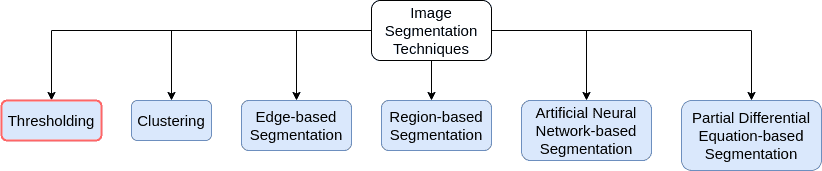  

You can see image thresholding (shown using a red bounding box) is a type of image segmentation.

Image thresholding be future sub-divied into the local and global image tresholding algorithms. In global thresholding, a single threshold is used globally, for the whole image. In local thresholding, some characteristics of some local image areas (e.g. the local contrast) may be used to choose a different threshold for different parts of the image.

## `References`:  
1. https://learnopencv.com/otsu-thresholding-with-opencv/  
1. https://www.geeksforgeeks.org/python-thresholding-techniques-using-opencv-set-3-otsu-thresholding/
1. https://www.geeksforgeeks.org/python-thresholding-techniques-using-opencv-set-2-adaptive-thresholding/  
1. https://pyimagesearch.com/2021/05/12/adaptive-thresholding-with-opencv-cv2-adaptivethreshold/#:~:text=adaptiveThreshold%20is%20the%20threshold%20method,have%20a%20value%20of%20255%20.  
1. https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html
1. https://www.geeksforgeeks.org/region-and-edge-based-segmentaion/
1. https://stackoverflow.com/questions/43923648/region-growing-python
1. https://en.wikipedia.org/wiki/Canny_edge_detector

## `Code`:

In [1]:
# importing all the necessary libraries/modules
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# importing the images
image1 = cv2.cvtColor(cv2.imread("D:/Z/Downloads/image1.jpg"), cv2.COLOR_BGR2RGB)
image2 = cv2.cvtColor(cv2.imread("D:/Z/Downloads/image2.jpg"), cv2.COLOR_BGR2RGB)
image3 = cv2.cvtColor(cv2.imread("D:/Z/Downloads/image3.jpg"), cv2.COLOR_BGR2RGB)

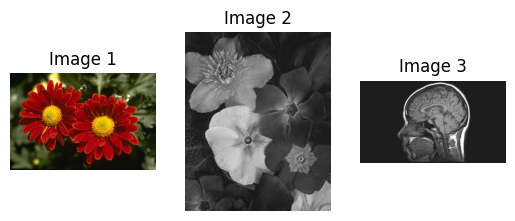

In [3]:
# displaying the pictures
plt.subplot(131),plt.imshow(image1, cmap = 'gray'),plt.title('Image 1'), plt.axis('off')
plt.subplot(132),plt.imshow(image2, cmap = 'gray'),plt.title('Image 2'),plt.axis('off')
plt.subplot(133),plt.imshow(image3, cmap = 'gray'),plt.title('Image 3'),plt.axis('off')
plt.show()

### *Otsu Thresholding*  
In Otsu Thresholding, a value of the threshold isn’t chosen but is determined automatically. A bimodal image (two distinct image values) is considered. The histogram generated contains two peaks. So, a generic condition would be to choose a threshold value that lies in the middle of both the histogram peak values.

In [4]:
# user defined function to convert the images to Grayscale
def convertGray(image):
    img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return img

In [19]:
    # creating a user-defined function for Otsu Thresholding
    def otsuThresh(image, lower_bound=120, upper_bound=255, returnValue=False):
        gray_image = convertGray(image)

        # applying Otsu thresholding as an extra flag in binary thresholding     
        ret, thresh = cv2.threshold(gray_image, lower_bound, upper_bound, cv2.THRESH_BINARY + cv2.THRESH_OTSU) 

        if returnValue == True:
            return ret, thresh
        else:
            return thresh

### *Adaptive Thresholding*:  
Adaptive thresholding is the method where the threshold value is calculated for smaller regions. This leads to different threshold values for different regions with respect to the change in lighting.

In [43]:
def adaptiveThresh(image, mean=False, gaussian=False, block_size=199, c=5):
    """
    Parameters:
    - image: The input image.
    - seed_point: A tuple (x,y) representing the starting point for the region growing.
    - threshold: The maximum difference in intensity for a pixel to be considered part of the region.
    
    Returns:
    - segmented: A binary image where the grown region is highlighted.
    """
    
    gray_image = convertGray(image)

    # applying different thresholding techniques on the input image
    if mean == True:
        thresh = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, block_size, c)
        return thresh
    elif gaussian == True:
        thresh = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, block_size, c)
        return thresh
    else:
        raise Exception("Select either Mean or Gaussian")

### `Region Growing`:  
In this segmentation, we grow regions by recursively including the neighboring pixels that are similar and connected to the seed pixel. We use similarity measures such as differences in gray levels for regions with homogeneous gray levels. We use connectivity to prevent connecting different parts of the image. 

In [54]:
# Region Growing segmentation
def regionGrowing(image, seed_point, threshold=5):
    
    """
    Parameters:
    - image: The input image.
    - seed_point: A tuple (x,y) representing the starting point for the region growing.
    - threshold: The maximum difference in intensity for a pixel to be considered part of the region.
    
    Returns:
    - segmented: A binary image where the grown region is highlighted.
    """
    image = convertGray(image)
    height, width = image.shape
    visited = np.zeros_like(image, dtype=np.uint8)
    segmented = np.zeros_like(image, dtype=np.uint8)
    
    # List of points to evaluate
    to_evaluate = [seed_point]
    
    # Start value (seed point intensity)
    start_value = image[seed_point]
    
    while len(to_evaluate) > 0:
        # Pop a point from the list
        x, y = to_evaluate.pop()
        
        # If the point was already visited, skip it
        if visited[y, x] == 1:
            continue
        
        # Mark the point as visited
        visited[y, x] = 1
        
        # Check if the point is similar to the seed point
        if abs(int(image[y, x]) - int(start_value)) <= threshold:
            segmented[y, x] = 255
            
            # Add neighboring points to the list
            if x > 0:
                to_evaluate.append((x-1, y))
            if x < width-1:
                to_evaluate.append((x+1, y))
            if y > 0:
                to_evaluate.append((x, y-1))
            if y < height-1:
                to_evaluate.append((x, y+1))
                
    return segmented

### `Edge Detection`:  
Edge detection is an image-processing technique that is used to identify the boundaries (edges) of objects or regions within an image. Edges are among the most important features associated with images. We know the underlying structure of an image through its edges. Computer vision processing pipelines, therefore, extensively use edge detection in applications.  

The Canny edge detector is an edge detection operator that uses a multi-stage algorithm to detect a wide range of edges in images.

In [69]:
# sobel edge detection
def sobelDetection(image, dx=1, dy=1, ksize=7):
    sobel = cv2.Sobel(image, ddepth=cv2.CV_64F, dx=dx, dy=dy, ksize=ksize)
    return sobel

In [75]:
# canny edge detection
def cannyDetection(image, minVal=100, maxVal=200):
    image_canny = cv2.Canny(image, minVal, maxVal)
    return image_canny

### `Segmentation`:  
Watershed is a transformation defined on a grayscale image. The idea is to consider the grayscale image as a topographic surface. Pixels having higher intensity denote peaks, whereas pixels with lower intensity denote valleys. The algorithm floods valleys (starting from seeds) with water up to the peaks. Regions of watersheds are then segmented.  

K-means clustering treats each pixel in the image as a data point and clusters these data points into K number of clusters based on pixel intensities.

In [80]:
def watershedSegmentation(image):
    """
    Apply Watershed segmentation on the given image.
    
    Parameters:
    - image: Input image.
    
    Returns:
    - segmented: A binary image where the regions are highlighted.
    """
    gray = convertGray(image)
    
    # Apply Otsu thresholding to get a binary image
    _, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    
    # Noise removal (Morphological operations)
    kernel = np.ones((3,3),np.uint8)
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations = 2)
    
    # Finding sure background area
    sure_bg = cv2.dilate(opening, kernel, iterations=3)
    
    # Finding sure foreground area using distance transform
    dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
    _, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)
    
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg, sure_fg)
    
    # Labeling markers
    _, markers = cv2.connectedComponents(sure_fg)
    markers = markers + 1
    markers[unknown == 255] = 0
    
    # Apply Watershed
    cv2.watershed(image, markers)
    image[markers == -1] = [0,0,255]
    segmented = np.zeros_like(gray)
    segmented[markers == -1] = 255
    
    return segmented

In [81]:
def kMeansSegmentation(image, K=2):
    """
    Apply K-means clustering segmentation on the given image.
    
    Parameters:
    - image: Input image.
    - K: Number of clusters.
    
    Returns:
    - segmented: An image where each segment is colored based on the cluster.
    """
    # Convert the image into a 2D array of pixels
    pixel_values = image.reshape((-1, 3))
    pixel_values = np.float32(pixel_values)
    
    # K-means clustering parameters
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    _, labels, centers = cv2.kmeans(pixel_values, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    
    # Convert back to uint8
    centers = np.uint8(centers)
    
    # Map the segmented values
    segmented_image = centers[labels.flatten()]
    
    # Reshape back to the original image
    segmented_image = segmented_image.reshape(image.shape)
    
    return segmented_image

### `Plotting`:

In [92]:
def plotSegmentedImages(image):
    """
    Apply multiple segmentation methods on the input image and plot the results.
    
    Parameters:
    - image: Input image.
    """
    
    # Apply the segmentation methods
    otsu_image = otsuThresh(image)
    adaptive_mean_image = adaptiveThresh(image, mean=True)
    adaptive_gaussian_image = adaptiveThresh(image, gaussian=True)
    region_growing_image = regionGrowing(image, (image.shape[1] // 2, image.shape[0] // 2))
    sobel_image = sobelDetection(image)
    canny_image = cannyDetection(image)
    watershed_image = watershedSegmentation(image)
    kmeans_image = kMeansSegmentation(image)
    
    # Plotting the results
    fig, axes = plt.subplots(3, 3, figsize=(15, 15))
    
    axes[0, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Displaying the actual image
    axes[0, 0].set_title("Original Image")
    axes[0, 0].axis('off')
    
    axes[0, 1].imshow(otsu_image, cmap='gray')
    axes[0, 1].set_title("Otsu Thresholding")
    axes[0, 1].axis('off')
    
    axes[0, 2].imshow(adaptive_mean_image, cmap='gray')
    axes[0, 2].set_title("Adaptive Mean Thresholding")
    axes[0, 2].axis('off')
    
    axes[1, 0].imshow(adaptive_gaussian_image, cmap='gray')
    axes[1, 0].set_title("Adaptive Gaussian Thresholding")
    axes[1, 0].axis('off')
    
    axes[1, 1].imshow(region_growing_image, cmap='gray')
    axes[1, 1].set_title("Region Growing")
    axes[1, 1].axis('off')
    
    axes[1, 2].imshow(sobel_image, cmap='gray')
    axes[1, 2].set_title("Sobel Detection")
    axes[1, 2].axis('off')
    
    axes[2, 0].imshow(canny_image, cmap='gray')
    axes[2, 0].set_title("Canny Detection")
    axes[2, 0].axis('off')
    
    axes[2, 1].imshow(watershed_image, cmap='gray')
    axes[2, 1].set_title("Watershed Segmentation")
    axes[2, 1].axis('off')
    
    axes[2, 2].imshow(cv2.cvtColor(kmeans_image, cv2.COLOR_BGR2RGB))
    axes[2, 2].set_title("K-means Clustering")
    axes[2, 2].axis('off')
    
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


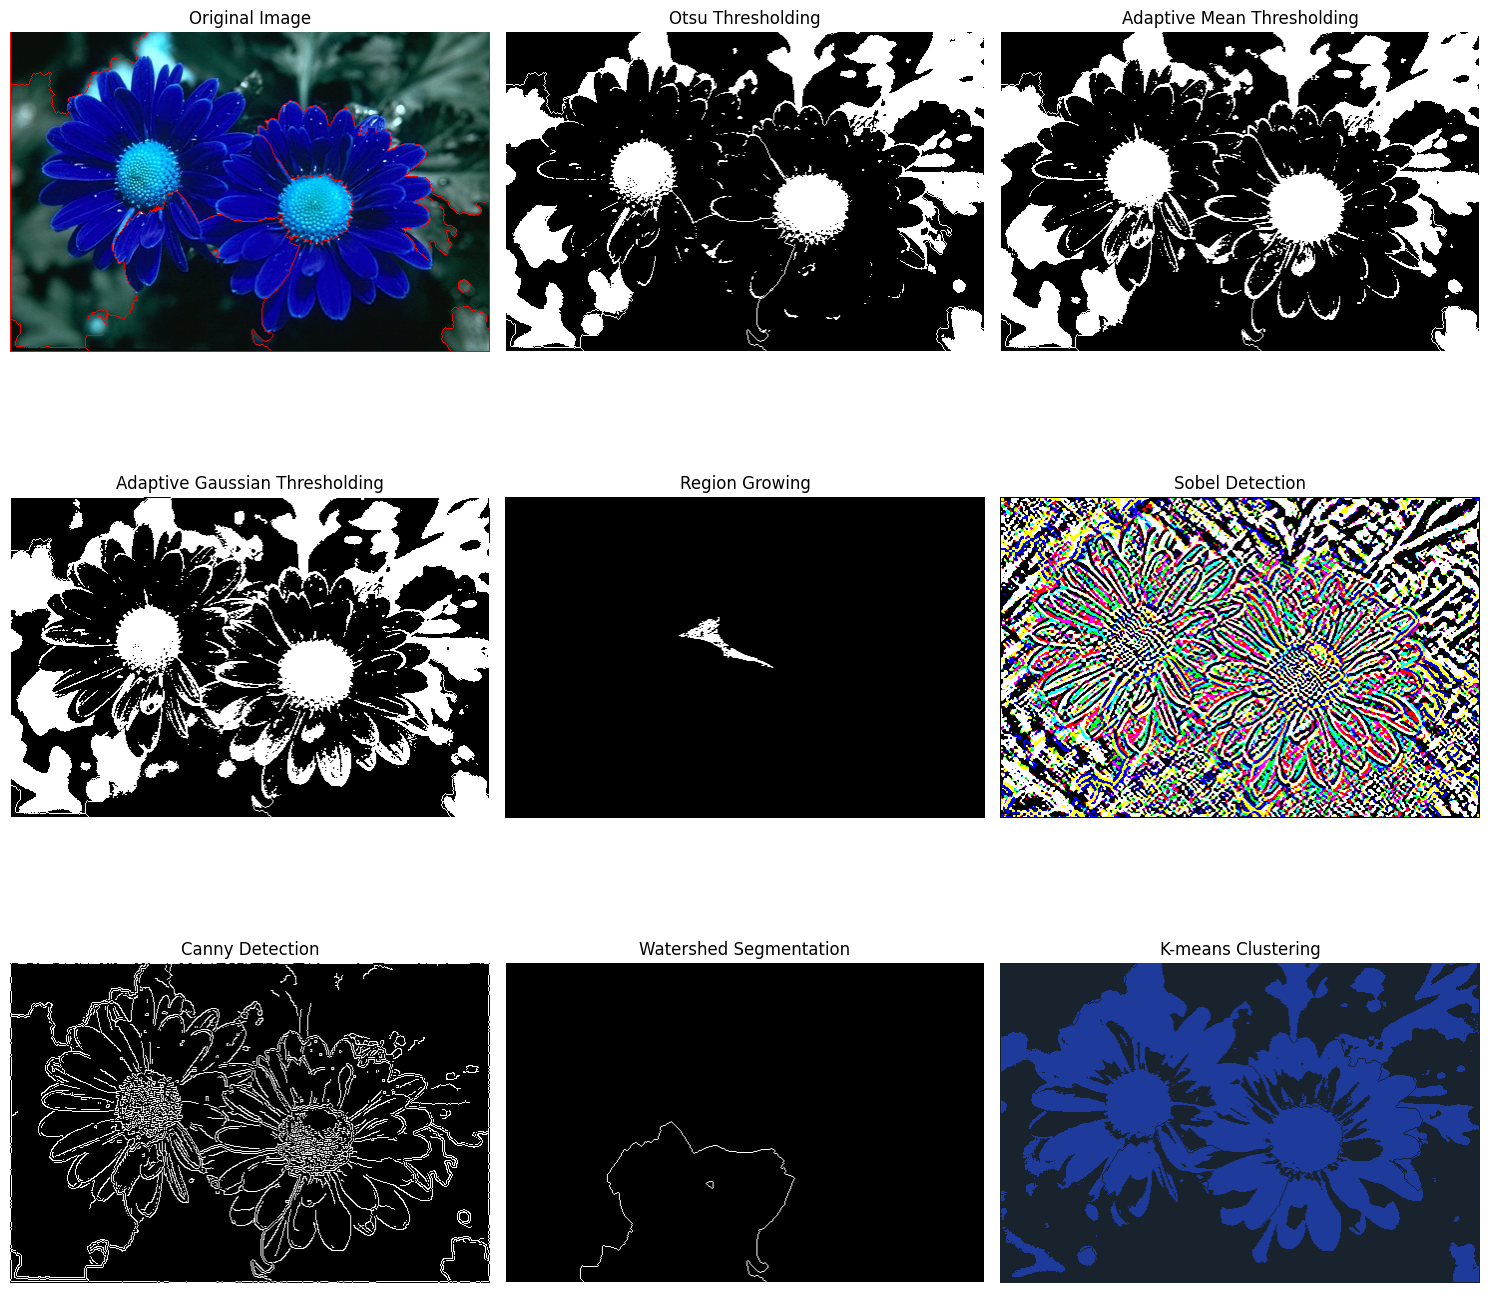

In [93]:
plotSegmentedImages(image1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


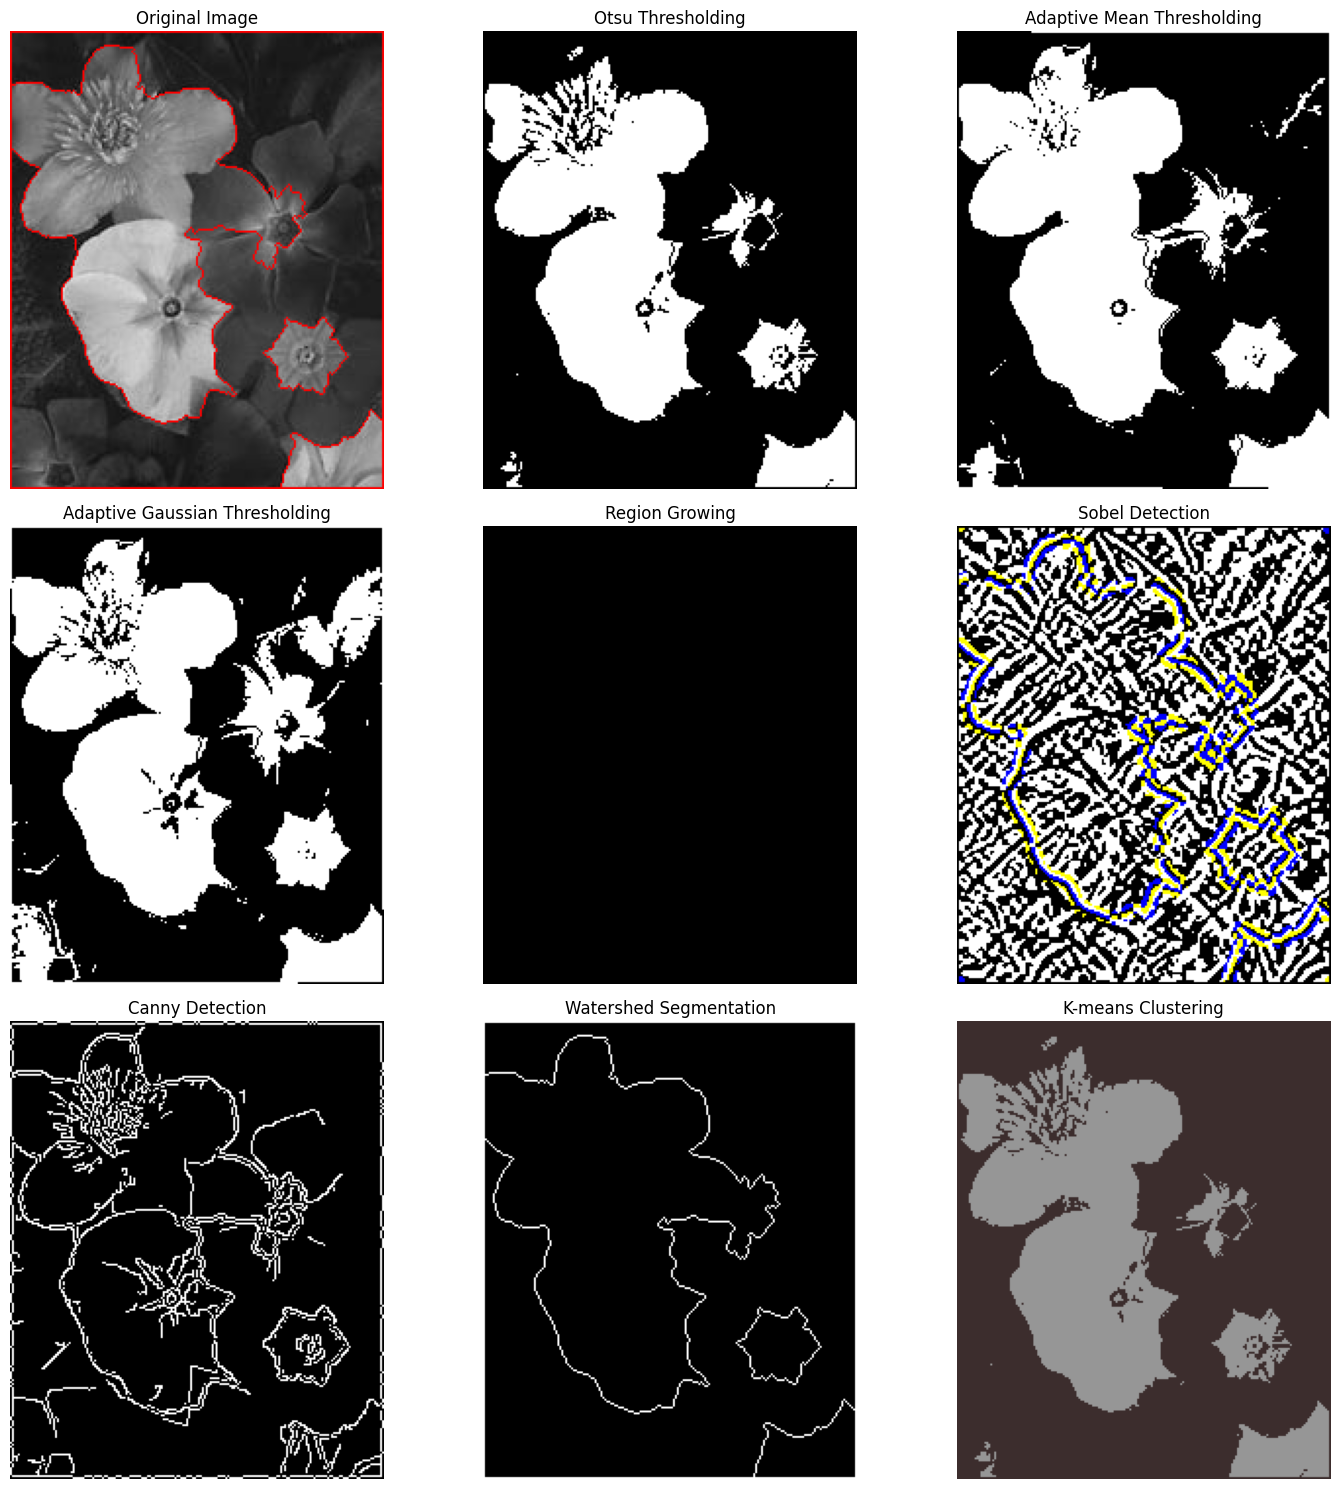

In [94]:
plotSegmentedImages(image2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


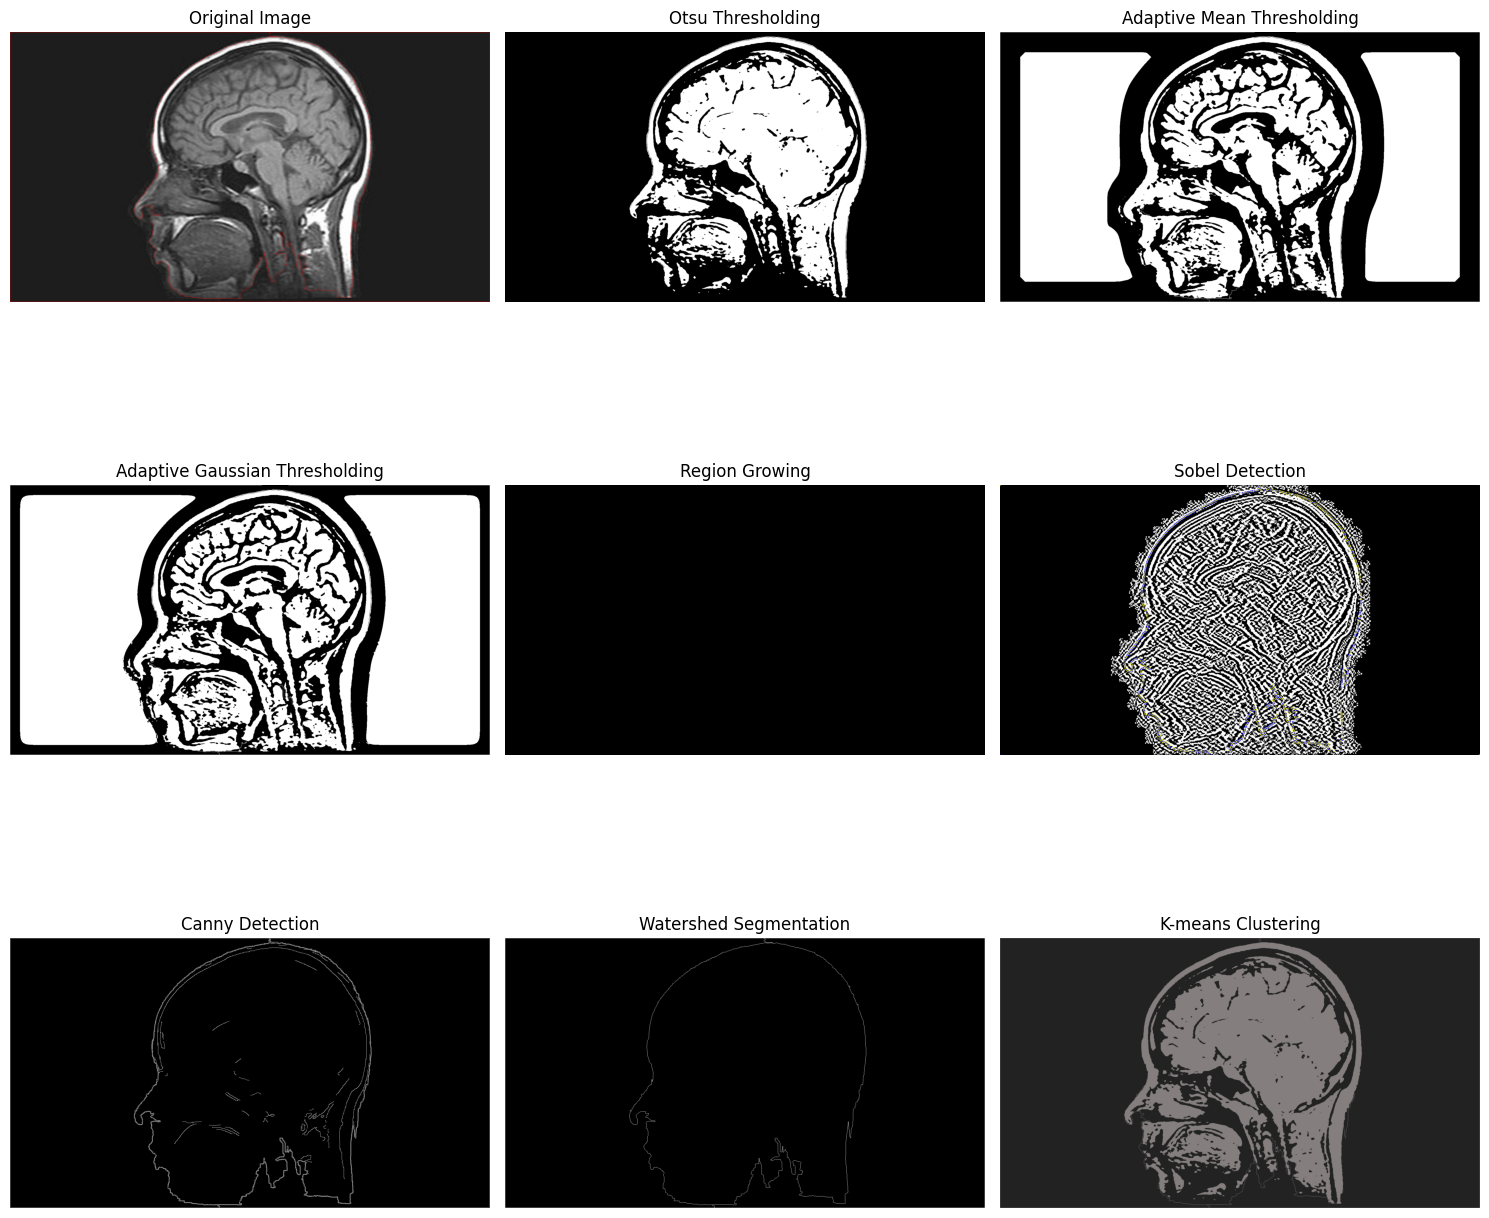

In [95]:
plotSegmentedImages(image3)

<hr>